In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import copy
from mpl_toolkits.mplot3d import Axes3D  

## Ising model Hamiltonian:

$$ H(\sigma) = - \sum_{ij}J_{ij}\sigma{i}\sigma{j}-\mu\sum_{j}h_{j}\sigma_{j}$$

In [2]:
def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))
#Evolución de la red, beta = 1/KT
def ising_step(field, beta=0.4):
    
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
                    
    return field
def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i % N, j % M]

    dE = 2 * field[n, m] * total
    if dE <= 0:
        field[n, m] *= -1
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

#Micro Canonical Normalization
def normalization(matrix):
    
    M = copy.copy(matrix)
    for time_series in M:
        time_series = (time_series - np.mean(time_series))/np.std(time_series)

    return M

def eigensys(list_of_matrices):#,normalize=1)

    list_of_eigenvalues = []
    list_of_eigenvectors = []

    for matrix in list_of_matrices:
        eigenvalues, eigenvectors = LA.eig(matrix)
 
    eigenvalues = np.real(eigenvalues)
    #evecs = np.real(evecs)
    eigenvectores = np.empty( [len(eigenvectors),len(eigenvectors[0])] )

    indices = np.argsort(eigenvalues)
    indices = indices[::-1]

    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:,indices]

    #if normalize:
    for i in range(len(eigenvectors[0])):
        eigenvectors[:,i] = eigenvectors[:,i]/LA.norm(eigenvectors[:,i])

    list_of_eigenvalues.append(eigenvalues)
    list_of_eigenvectors.append(eigenvectores)

    return np.stack(list_of_eigenvalues), np.stack(list_of_eigenvectors)

def correlacion_promedio(M):
    return np.mean([ M[i,j] for i in range(len(M)) for j in range(i+1,len(M[0]))])

In [180]:
#Lattice size 400by400
A = random_spin_field(50,50)

In [181]:
#Evol
matrices= [A]
for i in range(50):
    matrices.append(ising_step(matrices[-1].copy()))

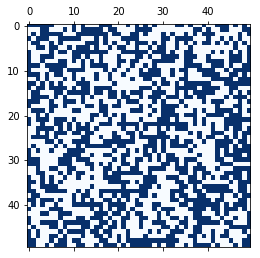

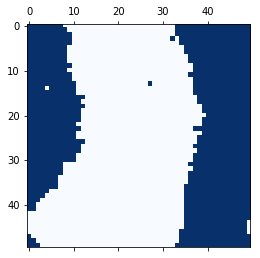

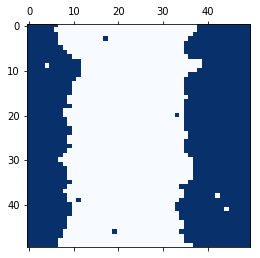

In [182]:
index = [0,25,50]
for i in index:
    plt.matshow(matrices[i], cmap=plt.cm.Blues, vmin=-1,vmax=1)
#    print(matrices[i])
    

In [92]:
#for matrix in matrices:
#    print(matrix)

In [183]:
np.shape(matrices)[0]

51

In [184]:
np.ndim(matrices)

3

## Turning the matrices into time series

In [185]:
B = []
#for i in range(len(A)):
for i in range(np.shape(matrices)[1]):
    for j in range(np.shape(matrices)[1]):
        row = [ matrices[k][i,j] for k in range(len(matrices))]
        B.append(row)

## Turning time series into Random walks

In [190]:
for i in range(len(B)):
    B[i] = np.cumsum(B[i])

In [191]:
len(B)

2500

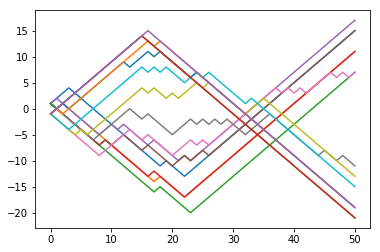

In [192]:
for i in range(15):
    plt.plot(B[i])
plt.show()

In [177]:
np.shape(B)

(2500, 51)

In [188]:
#Micro Canonical Normalizacion 
#N = normalization(B)

In [164]:

#Matrices de correlacion


In [193]:
B[0]

array([  1,   2,   3,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,  -5,
        -6,  -7,  -8,  -9, -10, -11, -10, -11, -12, -13, -12, -11, -10,
        -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15],
      dtype=int32)

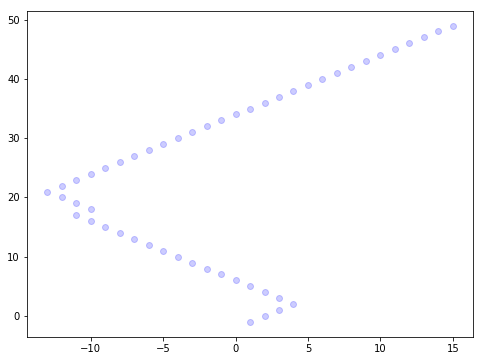

In [200]:
plt.figure(figsize = (8,6))
plt.scatter(B[0],B[1000],alpha = 0.2,color = 'blue')
plt.show()

In [201]:
C = np.corrcoef(B)

In [216]:
np.shape(C)

(2500, 2500)

#PCA: covariance matrix vs correlation matrix
$$ Cov = \frac{1}{N} D^{t}D$$
$$ Corr = \frac{1}{T} DD^{t} $$

In [256]:
def pca(data,nRedDim=0):
    # Centre data
    m = np.mean(data,axis=0)
    data -= m
    # Covariance matrix
    C = np.cov(np.transpose(data))
    Corr = np.corrcoef(data)
    evals,evecs = LA.eigh(C)
    
    eigval,eigvecs = LA.eigh(Corr)

    if nRedDim>0:
        evecs = evecs[:,-nRedDim:]
    if nRedDim>0:
        eigvecs = eigvecs[:,-nRedDim:]        

    x = np.dot(np.transpose(evecs),np.transpose(data))
    x1 = np.dot(np.transpose(eigvecs),data)
    # Compute the original data again
    y=np.transpose(np.dot(evecs,x))+m
    return x,x1,#y

In [252]:
P,P1= pca(B,nRedDim = 3)

In [232]:
np.shape(P)

(3, 2500)

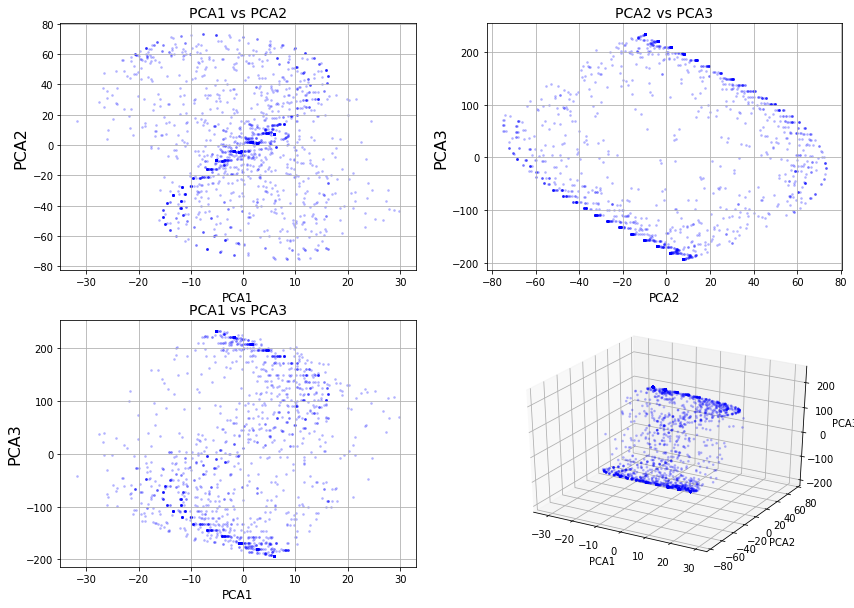

In [253]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224, projection='3d')


ax.scatter(P[0],P[1],color = 'blue',alpha = 0.2,s = 3)
bx.scatter(P[1],P[2],color = 'blue',alpha = 0.2,s= 3)
cx.scatter(P[0],P[2],color = 'blue',alpha = 0.2,s= 3)

ax.set_title('PCA1 vs PCA2', fontsize = 14)
ax.set_xlabel("PCA1",  fontsize = 12)
ax.set_ylabel("PCA2",  fontsize = 16)
ax.grid(True)

bx.set_title('PCA2 vs PCA3', fontsize = 14)
bx.set_xlabel("PCA2",  fontsize = 12)
bx.set_ylabel("PCA3",  fontsize = 16)
bx.grid(True)

cx.set_title('PCA1 vs PCA3', fontsize = 14)
cx.set_xlabel("PCA1",  fontsize = 12)
cx.set_ylabel("PCA3",  fontsize = 16)
cx.grid(True)

dx.scatter(P[0], P[1], P[2],color = 'blue',alpha = 0.2,s= 3)
dx.set_xlabel('PCA1')
dx.set_ylabel('PCA2')
dx.set_zlabel('PCA3')

plt.show()

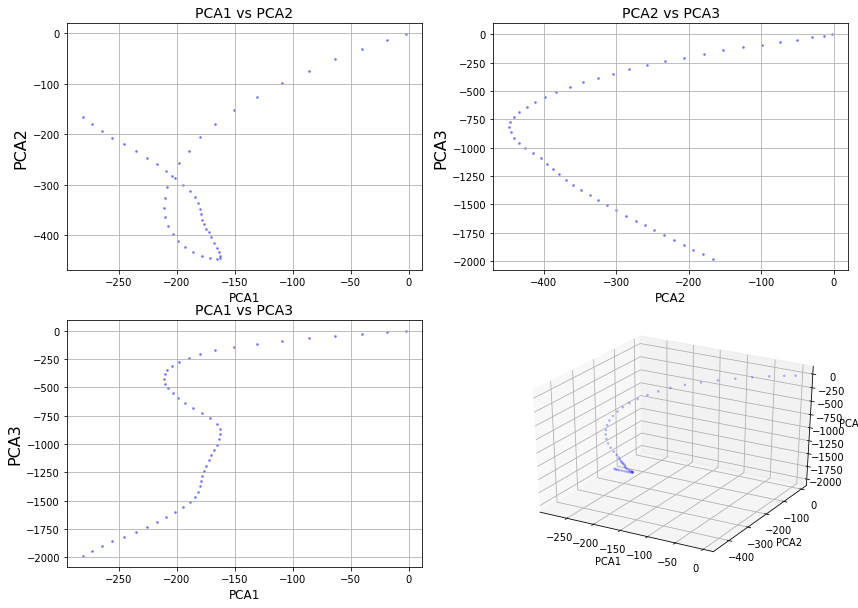

In [250]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224, projection='3d')


ax.scatter(P1[0],P1[1],color = 'blue',alpha = 0.4,s = 3)
bx.scatter(P1[1],P1[2],color = 'blue',alpha = 0.4,s= 3)
cx.scatter(P1[0],P1[2],color = 'blue',alpha = 0.4,s= 3)

ax.set_title('PCA1 vs PCA2', fontsize = 14)
ax.set_xlabel("PCA1",  fontsize = 12)
ax.set_ylabel("PCA2",  fontsize = 16)
ax.grid(True)

bx.set_title('PCA2 vs PCA3', fontsize = 14)
bx.set_xlabel("PCA2",  fontsize = 12)
bx.set_ylabel("PCA3",  fontsize = 16)
bx.grid(True)

cx.set_title('PCA1 vs PCA3', fontsize = 14)
cx.set_xlabel("PCA1",  fontsize = 12)
cx.set_ylabel("PCA3",  fontsize = 16)
cx.grid(True)

dx.scatter(P1[0], P1[1], P1[2],color = 'blue',alpha = 0.2,s= 3)
dx.set_xlabel('PCA1')
dx.set_ylabel('PCA2')
dx.set_zlabel('PCA3')

plt.show()